In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
import joblib

In [2]:
df = pd.read_csv("Dataset/creditcard.csv")

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


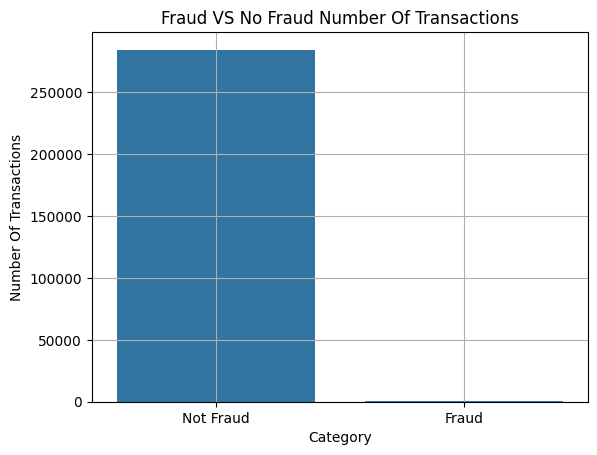

In [4]:
category = df["Class"].value_counts().index
frequency_of_category = df["Class"].value_counts().values

sns.barplot(x = category, y = frequency_of_category)
plt.xticks([0, 1], ["Not Fraud", "Fraud"])
plt.xlabel("Category")
plt.ylabel("Number Of Transactions")
plt.title("Fraud VS No Fraud Number Of Transactions")
plt.grid()
plt.show()

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


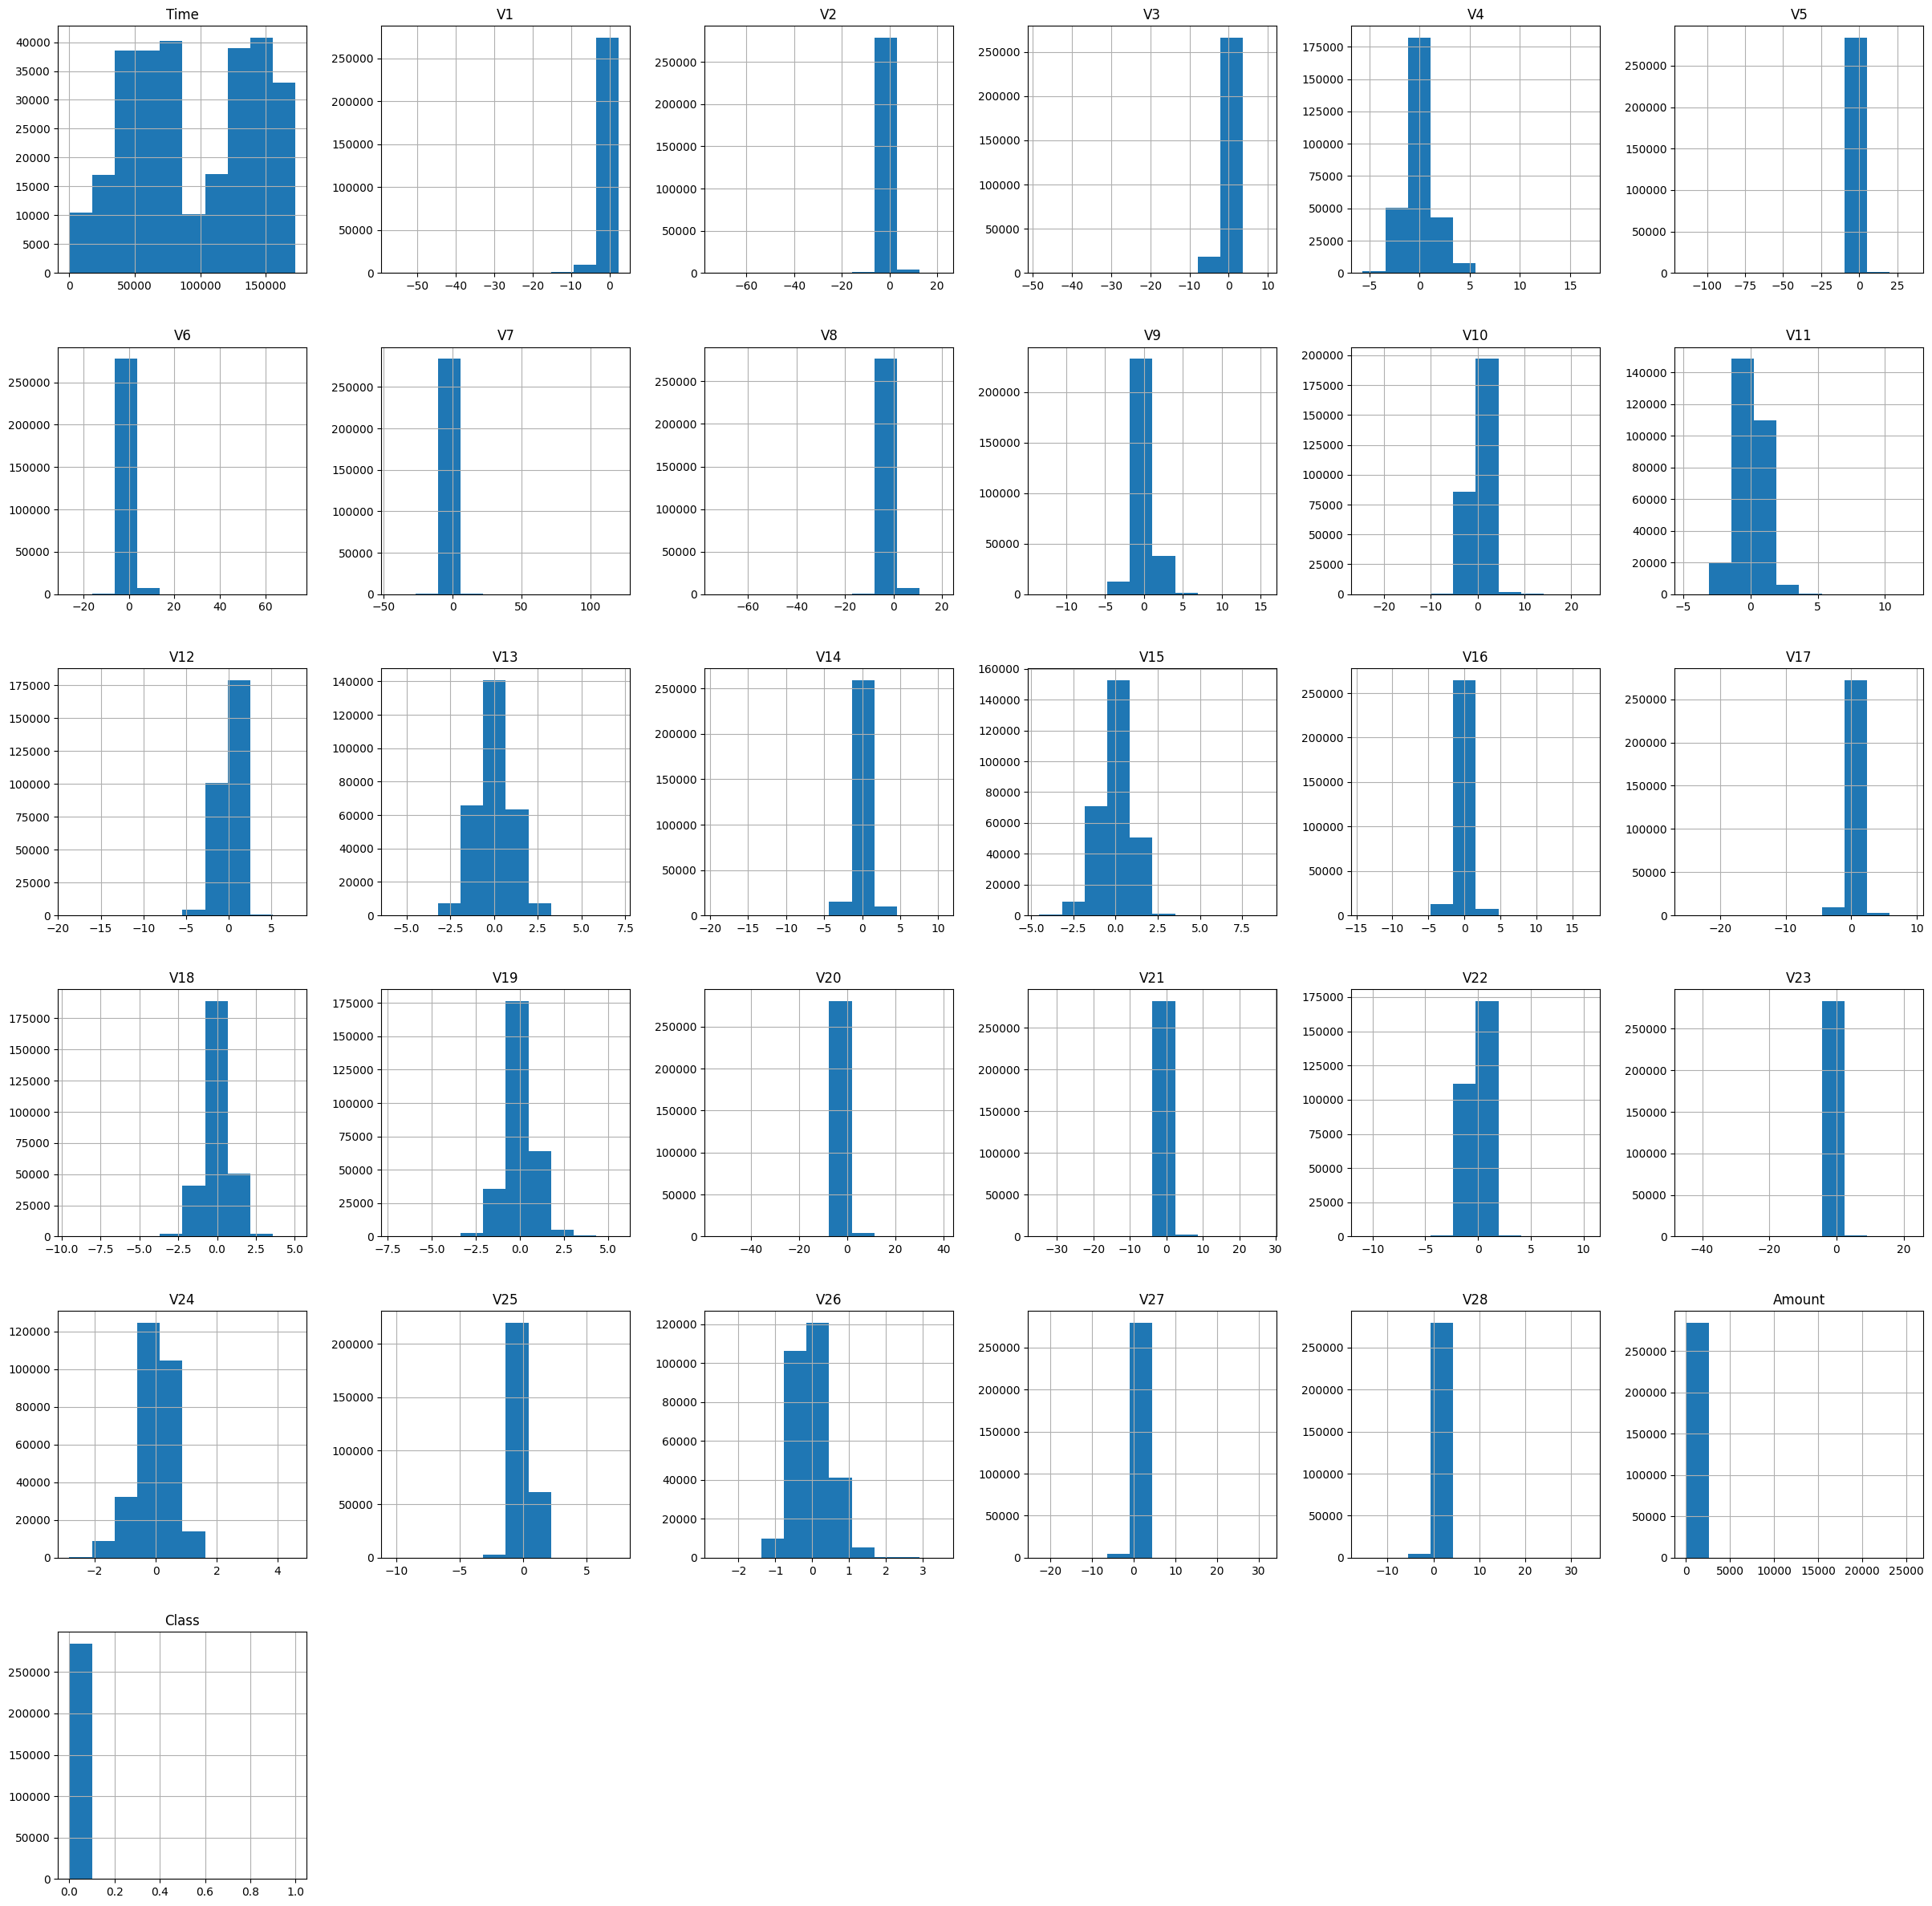

In [6]:
df.hist(figsize = (30, 30))
plt.show()

In [7]:
def outlier_removal(df, *args):
    prep_df = df.copy()
    for column in args:
        q1 = prep_df[column].quantile(0.25)
        q3 = prep_df[column].quantile(0.75)
        iqr = q3 - q1
        lower_fence = q1 - (1.5 * iqr)
        upper_fence = q3 + (1.5 * iqr)
        prep_df = df[~((df[column] > upper_fence) | (df[column] < lower_fence))]
    return prep_df

In [8]:
df = outlier_removal(df, "Time", "Amount")

In [9]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0


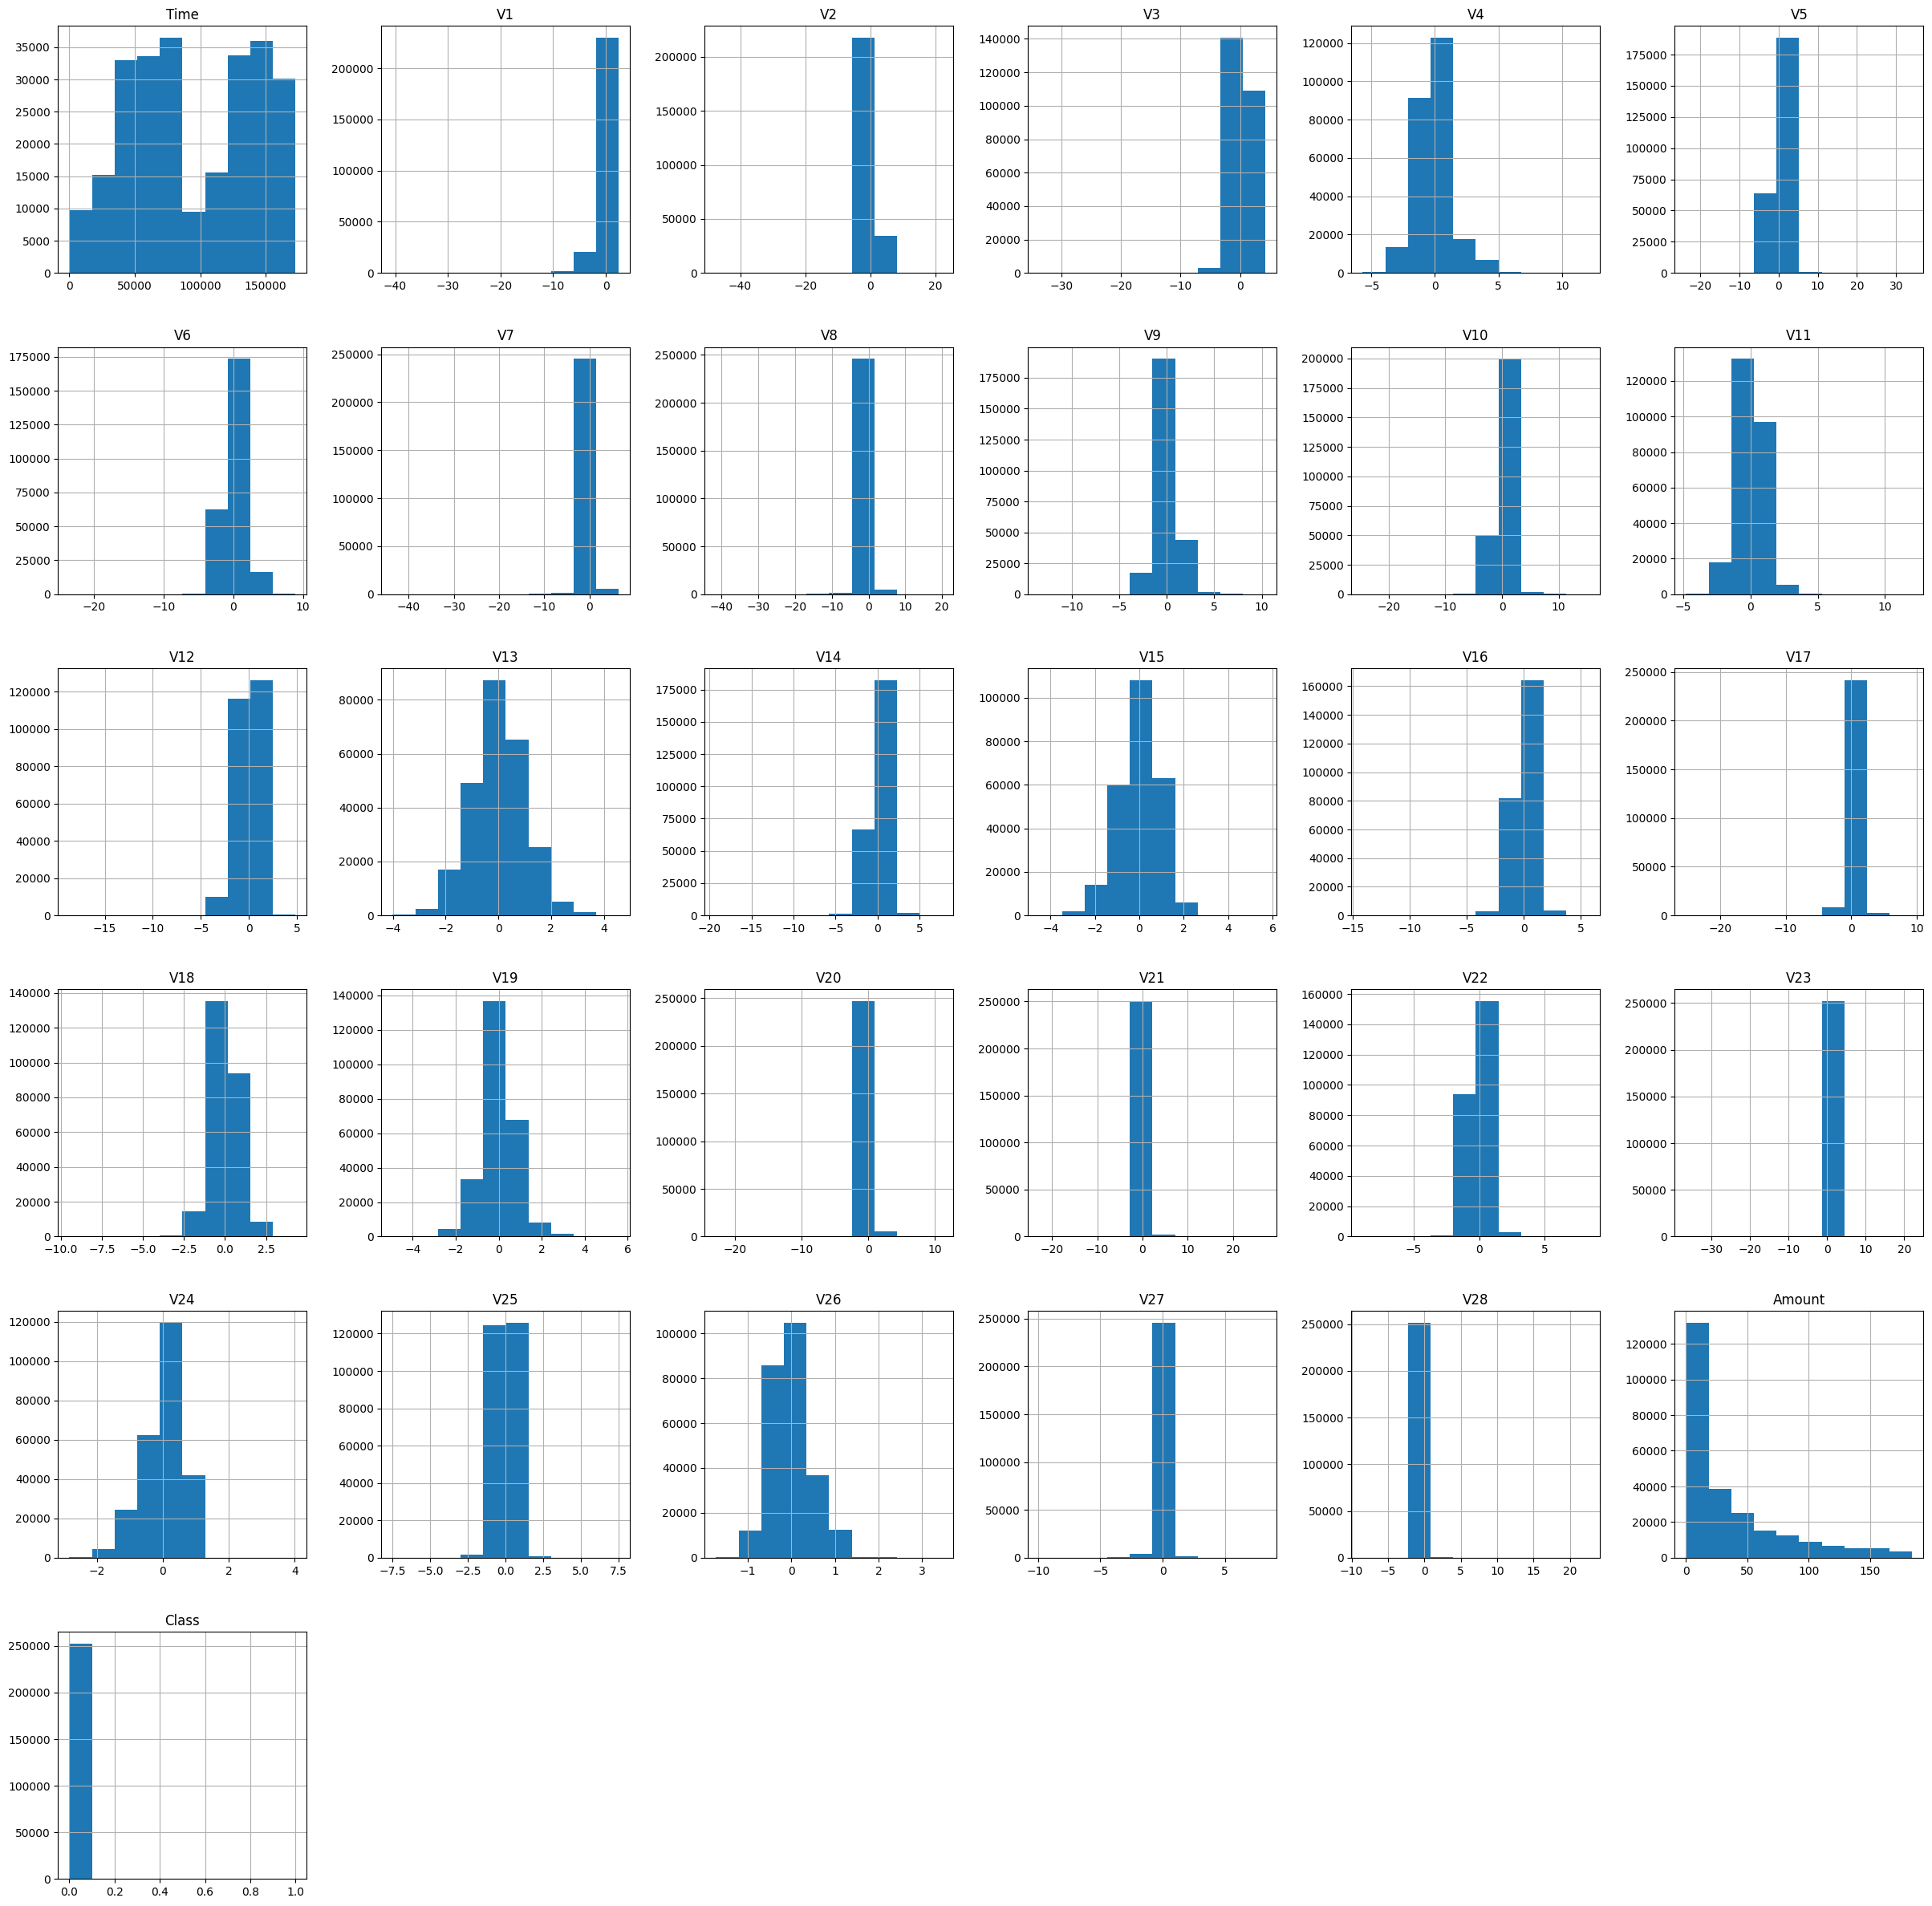

In [10]:
df.hist(figsize = (30, 30))
plt.show()

In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,...,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000,252903.000000
mean,94986.492228,0.094504,0.230435,0.060689,-0.019030,0.116567,-0.059286,-0.083767,0.024857,0.008731,...,-0.018557,0.002675,0.006637,0.001982,0.002301,-0.001892,0.002238,-0.001567,34.974887,0.001586
std,47594.978003,1.820271,1.293522,1.471043,1.393801,1.214682,1.264431,1.038737,1.156919,1.081381,...,0.705072,0.714132,0.433929,0.602656,0.505696,0.469089,0.371147,0.266247,42.172250,0.039788
min,0.000000,-40.470142,-47.429676,-33.680984,-5.683171,-23.669726,-23.496714,-43.557242,-41.484823,-13.434066,...,-22.797604,-8.887017,-36.666000,-2.836627,-7.495741,-1.732008,-9.895244,-8.478686,0.000000,0.000000
25%,54533.500000,-0.859648,-0.397907,-0.816557,-0.850251,-0.567459,-0.793053,-0.576955,-0.196253,-0.615814,...,-0.237517,-0.544744,-0.141823,-0.355170,-0.314581,-0.322206,-0.063949,-0.054103,4.490000,0.000000
50%,85041.000000,0.035238,0.165842,0.225603,-0.024476,0.021158,-0.318741,0.016034,0.029424,-0.045243,...,-0.047347,0.005992,-0.005033,0.040299,0.012927,-0.041085,0.006947,0.008817,16.000000,0.000000
75%,139586.000000,1.356675,0.878353,1.067617,0.717123,0.666514,0.311231,0.515631,0.335343,0.583818,...,0.158554,0.528770,0.141507,0.439066,0.349265,0.229586,0.096233,0.072347,49.990000,0.000000
max,172788.000000,2.454930,22.057729,4.226108,12.114672,34.099309,8.933762,6.491054,20.007208,10.392889,...,27.202839,8.361985,22.083545,4.022866,7.519589,3.463246,8.254376,22.620072,184.500000,1.000000


In [12]:
X = df.drop("Class", axis = 1)
y = df["Class"]

In [13]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,0.000676,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88


In [14]:
y

0         0
1         0
3         0
4         0
5         0
         ..
284801    0
284802    0
284803    0
284804    0
284805    0
Name: Class, Length: 252903, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [16]:
ss = StandardScaler()

In [17]:
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Handling imbalanced y_train

In [18]:
y_train.value_counts()

Class
0    201995
1       327
Name: count, dtype: int64

In [19]:
ros = RandomOverSampler()

In [20]:
X_train, y_train = ros.fit_resample(X_train, y_train)

In [21]:
y_train.value_counts()

Class
0    201995
1    201995
Name: count, dtype: int64

# Logistic Regression Model

Accuracy: 97.97
              precision    recall  f1-score   support

   Not Fraud       1.00      0.98      0.99     50507
       Fraud       0.06      0.89      0.11        74

    accuracy                           0.98     50581
   macro avg       0.53      0.94      0.55     50581
weighted avg       1.00      0.98      0.99     50581



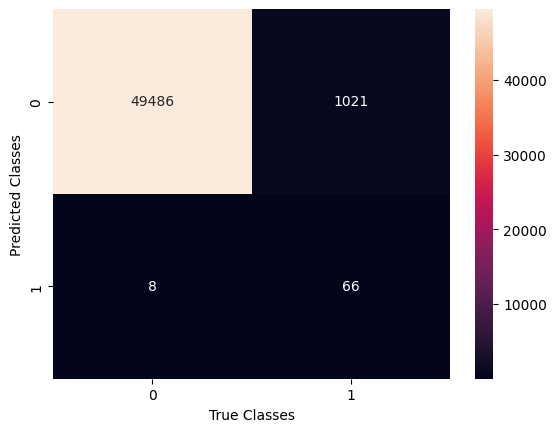

In [22]:
lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)

print(f"Accuracy: {lr_model.score(X_test, y_test) * 100:.2f}")

predictions = lr_model.predict(X_test)

print(classification_report(y_test, predictions, target_names = ["Not Fraud", "Fraud"]))

sns.heatmap(confusion_matrix(y_test, predictions), annot = True, fmt = "d")
plt.xlabel("True Classes")
plt.ylabel("Predicted Classes")
plt.show()

# Decision Tree Classifier

Accuracy: 99.92
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     50507
       Fraud       0.76      0.72      0.74        74

    accuracy                           1.00     50581
   macro avg       0.88      0.86      0.87     50581
weighted avg       1.00      1.00      1.00     50581



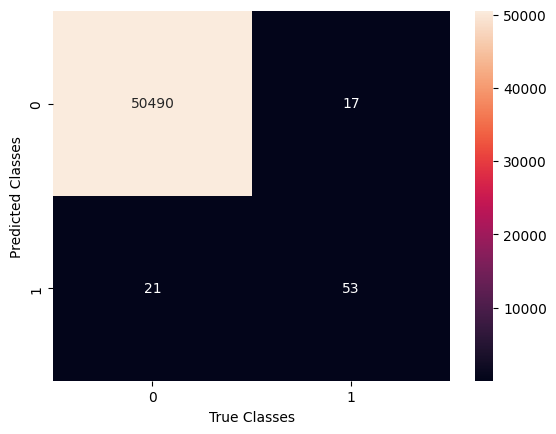

In [23]:
dtc_model = DecisionTreeClassifier()

dtc_model.fit(X_train, y_train)

print(f"Accuracy: {dtc_model.score(X_test, y_test) * 100:.2f}")

predictions = dtc_model.predict(X_test)

print(classification_report(y_test, predictions, target_names = ["Not Fraud", "Fraud"]))

sns.heatmap(confusion_matrix(y_test, predictions), annot = True, fmt = "d")
plt.xlabel("True Classes")
plt.ylabel("Predicted Classes")
plt.show()

# Neural Network

In [24]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape = (X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
history = nn_model.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
12625/12625 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - accuracy: 0.9686 - loss: 0.0929 - val_accuracy: 0.9980 - val_loss: 0.0183
Epoch 2/10
12625/12625 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - accuracy: 0.9971 - loss: 0.0111 - val_accuracy: 0.9985 - val_loss: 0.0200
Epoch 3/10
12625/12625 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.9977 - loss: 0.0087 - val_accuracy: 0.9988 - val_loss: 0.0239
Epoch 4/10
12625/12625 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.9980 - loss: 0.0081 - val_accuracy: 0.9990 - val_loss: 0.0241
Epoch 5/10
12625/12625 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.9982 - loss: 0.0070 - val_accuracy: 0.9990 - val_loss: 0.0270
Epoch 6/10
12625/12625 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9985 - loss: 0.0064 - val_accuracy: 0.9990 - val_loss: 0.0290
Epoch 7/10
12625/12625 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9986 - loss: 0.0055 - val_accuracy: 0.9989 - val_loss: 0.0302
Epoch 8/10
12625/12625 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 

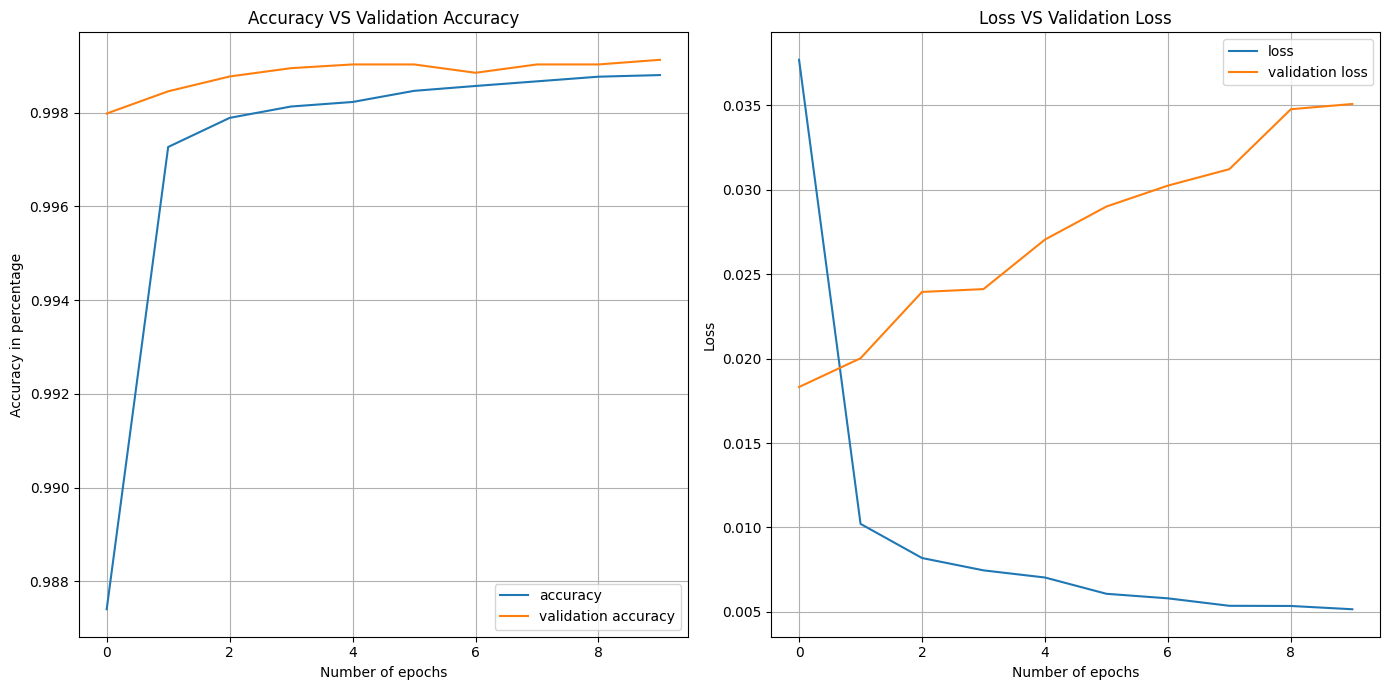

In [26]:
fig, axis = plt.subplots(ncols = 2, figsize = (14, 7))

axis[0].plot(history.history["accuracy"], label = "accuracy")
axis[0].plot(history.history["val_accuracy"], label = "validation accuracy")
axis[0].set_xlabel("Number of epochs")
axis[0].set_ylabel("Accuracy in percentage")
axis[0].set_title("Accuracy VS Validation Accuracy")
axis[0].grid(True)
axis[0].legend()

axis[1].plot(history.history["loss"], label = "loss")
axis[1].plot(history.history["val_loss"], label = "validation loss")
axis[1].set_xlabel("Number of epochs")
axis[1].set_ylabel("Loss")
axis[1].set_title("Loss VS Validation Loss")
plt.grid(True)
axis[1].legend()

plt.tight_layout()
plt.show()

In [27]:
loss, accuracy = nn_model.evaluate(X_test, y_test)
print(loss, accuracy)

1581/1581 ━━━━━━━━━━━━━━━━━━━━ 1s 851us/step - accuracy: 0.9991 - loss: 0.0392
0.03507658466696739 0.999130129814148


1581/1581 ━━━━━━━━━━━━━━━━━━━━ 1s 886us/step
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     50507
       Fraud       0.67      0.80      0.73        74

    accuracy                           1.00     50581
   macro avg       0.84      0.90      0.86     50581
weighted avg       1.00      1.00      1.00     50581



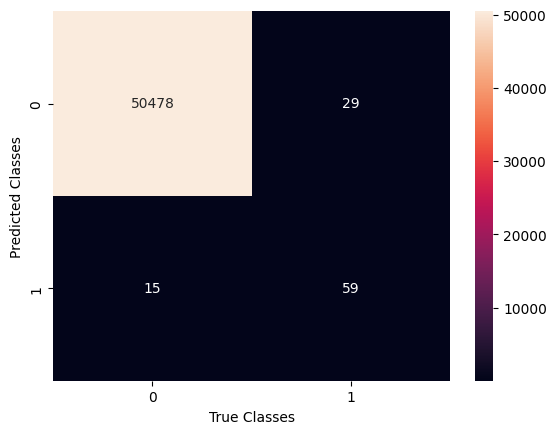

In [28]:
predictions = nn_model.predict(X_test).flatten()
predictions = [1 if prediction > 0.5 else 0 for prediction in predictions]

print(classification_report(y_test, predictions, target_names = ["Not Fraud", "Fraud"]))

sns.heatmap(confusion_matrix(y_test, predictions), annot = True, fmt = "d")
plt.xlabel("True Classes")
plt.ylabel("Predicted Classes")
plt.show()

# Random Forest Classifier

Accuracy: 99.96
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     50507
       Fraud       0.95      0.80      0.87        74

    accuracy                           1.00     50581
   macro avg       0.98      0.90      0.93     50581
weighted avg       1.00      1.00      1.00     50581



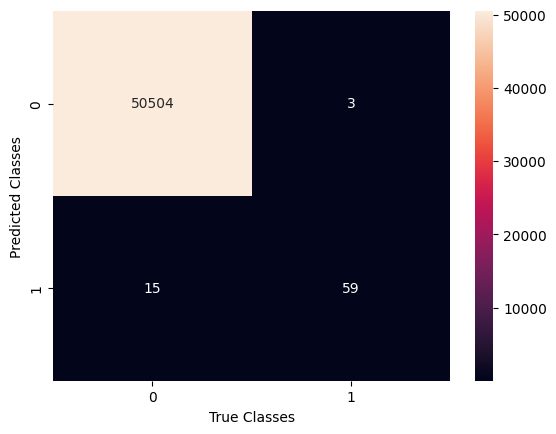

In [30]:
rfc_model = RandomForestClassifier()

rfc_model.fit(X_train, y_train)

print(f"Accuracy: {rfc_model.score(X_test, y_test) * 100:.2f}")

predictions = rfc_model.predict(X_test)

print(classification_report(y_test, predictions, target_names = ["Not Fraud", "Fraud"]))

sns.heatmap(confusion_matrix(y_test, predictions), annot = True, fmt = "d")
plt.xlabel("True Classes")
plt.ylabel("Predicted Classes")
plt.show()

# Gradient Boosting Classifier

Accuracy: 99.57
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     50507
       Fraud       0.24      0.88      0.37        74

    accuracy                           1.00     50581
   macro avg       0.62      0.94      0.69     50581
weighted avg       1.00      1.00      1.00     50581



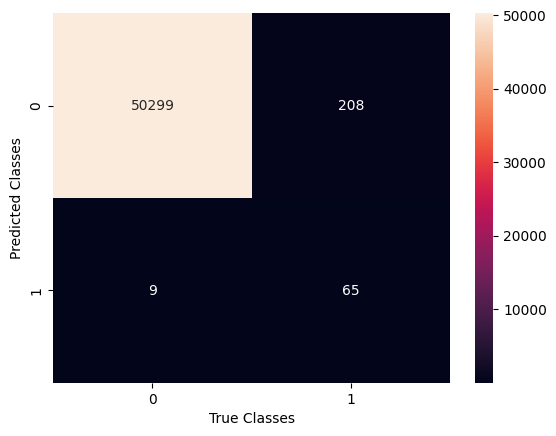

In [32]:
gbc_model = GradientBoostingClassifier()

gbc_model.fit(X_train, y_train)

print(f"Accuracy: {gbc_model.score(X_test, y_test) * 100:.2f}")

predictions = gbc_model.predict(X_test)

print(classification_report(y_test, predictions, target_names = ["Not Fraud", "Fraud"]))

sns.heatmap(confusion_matrix(y_test, predictions), annot = True, fmt = "d")
plt.xlabel("True Classes")
plt.ylabel("Predicted Classes")
plt.show()

# Support Vector Machines

C:\Users\razan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\razan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 98.27
              precision    recall  f1-score   support

   Not Fraud       1.00      0.98      0.99     50507
       Fraud       0.07      0.91      0.13        74

    accuracy                           0.98     50581
   macro avg       0.54      0.94      0.56     50581
weighted avg       1.00      0.98      0.99     50581



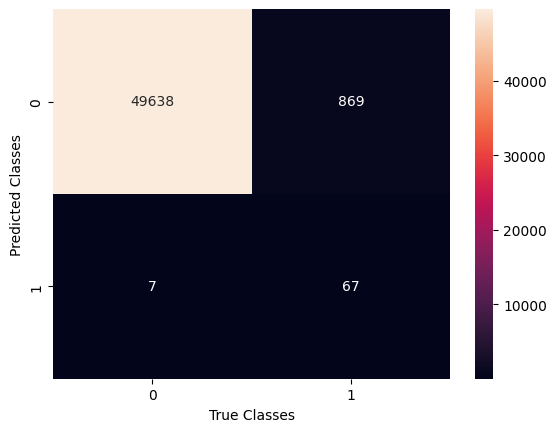

In [36]:
l_svc_model = LinearSVC()

l_svc_model.fit(X_train, y_train)

print(f"Accuracy: {l_svc_model.score(X_test, y_test) * 100:.2f}")

predictions = l_svc_model.predict(X_test)

print(classification_report(y_test, predictions, target_names = ["Not Fraud", "Fraud"]))

sns.heatmap(confusion_matrix(y_test, predictions), annot = True, fmt = "d")
plt.xlabel("True Classes")
plt.ylabel("Predicted Classes")
plt.show()

# Exporting Random Forest Classifier because it's performing the best

In [81]:
joblib.dump(rfc_model, "./model/random_forest_classifier.pkl")

['./model/random_forest_classifier.pkl']